### EDA and ML Pipeline

### Import 

In [171]:

import subprocess
from pathlib import Path
import pandas as pd

try:
    repo_root = subprocess.run(
        ["git", "rev-parse", "--show-toplevel"],
        capture_output=True,
        text=True,
        check=True
    ).stdout.strip()
except subprocess.CalledProcessError:
    repo_root = Path.cwd()  # fallback if not in a git repo

csv_path = Path(repo_root) / "FullSimDF.csv"
dog_dat = pd.read_csv(csv_path)



In [172]:
dog_dat.head()

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,is_brachycephalic,Energy Level,Playfulness Level,...,Hum_Diff,CBT_simulated,is_old,is_overweight,heat_stress_risk,High_humidity_fordogs,prior_heat_related_injury_est,simulated_heat_injury_flag,target2Category,target3Category
0,Yorkshire Terrier,9.6,25.3,Male,Tricolor,Long,Silky,0.0,3.543823,1.930809,...,12.99,40.511511,0,0,0,1,0.002,0,1,Heat Stress
1,Poodle,4.3,43.6,Female,Gray,Long,Curly,0.0,2.856352,1.334560,...,11.75,38.406988,0,1,1,1,0.052,0,0,Normal
2,French Bulldog,3.5,33.3,Male,Cream,Short,Smooth,1.0,3.588762,4.748225,...,2.55,39.389887,0,0,1,0,0.052,0,0,Normal
3,Pembroke Welsh Corgi,6.4,49.6,Female,Cream,Short,Double,0.0,3.507116,4.176902,...,3.26,38.831824,0,1,1,0,0.052,0,0,Normal
4,Weimaraner,3.0,59.7,Male,Brown,Short,Smooth,0.0,3.832747,3.935919,...,3.96,39.439888,0,1,1,0,0.052,0,0,Normal


In [173]:
# column names
dog_dat.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'is_brachycephalic', 'Energy Level', 'Playfulness Level',
       'size_category', 'Spayed/Neutered', 'Indoor/Outdoor', 'Season',
       'Sun Exposure', 'Wind Cooling Effect', 'Station_Temp',
       'Station_Humidity', 'Ambient_Temp', 'Ambient_Humidity', 'T_device',
       'H_device', 'breed_wt_mu', 'breed_wt_sd', 'ideal_weight',
       'pct_of_ideal', 'BCS_cont', 'BCS', 'Temp_Diff', 'Hum_Diff',
       'CBT_simulated', 'is_old', 'is_overweight', 'heat_stress_risk',
       'High_humidity_fordogs', 'prior_heat_related_injury_est',
       'simulated_heat_injury_flag', 'target2Category', 'target3Category'],
      dtype='object')

## EDA

In [174]:
import matplotlib.pyplot as plt

### Univariate

(array([3.000e+00, 3.000e+00, 9.000e+00, 5.800e+01, 1.490e+02, 2.530e+02,
        5.840e+02, 8.620e+02, 1.234e+03, 1.431e+03, 1.512e+03, 1.287e+03,
        9.330e+02, 5.660e+02, 2.940e+02, 1.200e+02, 4.600e+01, 1.700e+01,
        4.000e+00, 1.000e+00]),
 array([-8.9 , -7.27, -5.64, -4.01, -2.38, -0.75,  0.88,  2.51,  4.14,
         5.77,  7.4 ,  9.03, 10.66, 12.29, 13.92, 15.55, 17.18, 18.81,
        20.44, 22.07, 23.7 ]),
 <BarContainer object of 20 artists>)

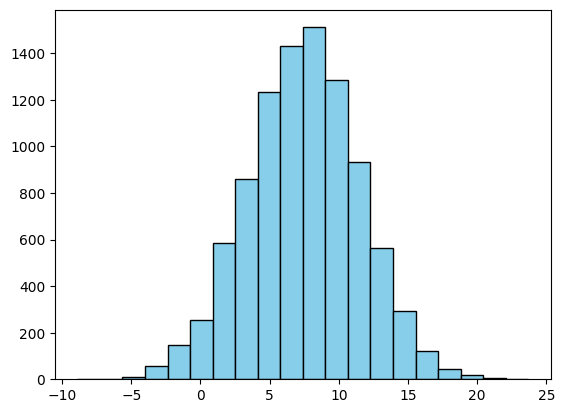

In [175]:
# Ella
plt.hist(dog_dat['Age'], bins=20, color='skyblue', edgecolor='black')
# Age is normally distributed about 7 years

In [176]:
# Kedar

In [177]:
# Swapnil

In [178]:
# Manaswi

### Bivariate

/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_82809/2035708879.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cats, patch_artist=True)


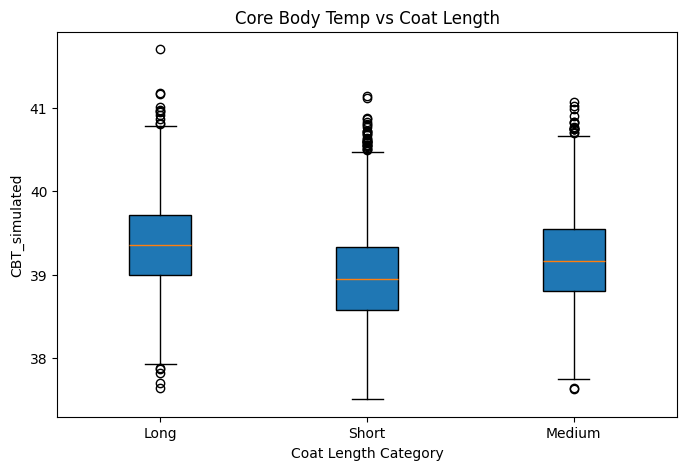

In [179]:
# Ella
cats = dog_dat['Coat Length'].unique()

# Create a list of CBT_simulated arrays, one per coat length category
data = [dog_dat.loc[dog_dat['Coat Length'] == c, 'CBT_simulated'] for c in cats]

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=cats, patch_artist=True)
plt.ylabel("CBT_simulated")
plt.xlabel("Coat Length Category")
plt.title("Core Body Temp vs Coat Length")
plt.show()# No clear correlation between coat length and CBT, looks like short and medium tend to have slightly lower 
# minimums of CBT but not by much

In [180]:
# Kedar

In [181]:
# Swapnil

In [182]:
# Manaswi

## Predicting Target Class

In [183]:
# Drop the target columns from X, and core body temp
X = dog_dat.drop(columns=['target2Category', 'target3Category', 'CBT_simulated'])
# Assume X is your feature set without targets
numeric_features = X.select_dtypes(include=['int64', 'float64'])
categorical_features = X.select_dtypes(include=['object', 'category'])
# One-hot encode categorical features
X_cat_encoded = pd.get_dummies(categorical_features, drop_first=True)
X_encoded = pd.concat([numeric_features, X_cat_encoded], axis=1)

# Binary target
y2 = dog_dat['target2Category']

# 3-class target
y3 = dog_dat['target3Category']
ordered_levels = ["Normal", "Heat Stress", "Heat Stroke"]
y3_cat = pd.Categorical(y3, categories=ordered_levels, ordered=True)
y3_num = y3.astype('category').cat.codes

### Using Binary Target Class

In [184]:
# correlation-based feature selection 
df2 = X_encoded.copy()
df2['target2'] = y2
corr_matrix2 = df2.corr()
target_corr2 = corr_matrix2['target2'].drop('target2')
print("Feature correlations with 2-class target:")
print(target_corr2.sort_values(ascending=False))


Feature correlations with 2-class target:
T_device               0.381953
Ambient_Temp           0.322054
Temp_Diff              0.312650
Hum_Diff               0.274681
Sun Exposure           0.271781
                         ...   
Coat Type_Wiry        -0.049807
Coat Type_Smooth      -0.140335
Wind Cooling Effect   -0.142745
Coat Length_Short     -0.150759
Season_Winter         -0.171583
Name: target2, Length: 104, dtype: float64


In [185]:
# taking out model-agnostic feature selection
# relevant_features2 = target_corr2[abs(target_corr2) > 0.1].index  # keep features with |corr| > 0.1
X2_filtered = X_encoded
X2_filtered.shape

(9366, 104)

In [186]:
# Train test split
from sklearn.model_selection import train_test_split
# Binary target train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_filtered, y2, test_size=0.2, random_state=42, stratify=y2
)

In [187]:
# SMOTE for balancing classes (only to training)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X2_train_res, y2_train_res = smote.fit_resample(X2_train, y2_train)
print("Original class distribution:\n", y2_train.value_counts())
print("After SMOTE:\n", y2_train_res.value_counts())


Original class distribution:
 target2Category
0    6635
1     857
Name: count, dtype: int64
After SMOTE:
 target2Category
0    6635
1    6635
Name: count, dtype: int64


### Using Three Class Target

In [188]:
# correlation-based feature selection
# 3-class target: convert to numeric

df3 = X_encoded.copy()
df3['target3'] = y3_num
corr_matrix3 = df3.corr()
target_corr3 = corr_matrix3['target3'].drop('target3')

print("Feature correlations with 3-class target:")
print(target_corr3.sort_values(ascending=False))


Feature correlations with 3-class target:
Season_Winter          0.170160
Coat Length_Short      0.148622
Coat Type_Smooth       0.138993
Wind Cooling Effect    0.135854
Coat Type_Wiry         0.048909
                         ...   
Sun Exposure          -0.259663
Hum_Diff              -0.265415
Temp_Diff             -0.300523
Ambient_Temp          -0.309392
T_device              -0.367003
Name: target3, Length: 104, dtype: float64


In [189]:
# relevant_features3 = target_corr3[abs(target_corr3) > 0.1].index # take out model agnostic selection
X3_filtered = X_encoded
X3_filtered.shape

(9366, 104)

In [190]:
# Train test split
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3_filtered, y3_num, test_size=0.2, random_state=42, stratify=y3
)

In [191]:
# SMOTE with 3 classes (training only)
smote3 = SMOTE(random_state=42, sampling_strategy='not majority' )
X3_train_res, y3_train_res = smote3.fit_resample(X3_train, y3_train)
print("Original class distribution:\n", y3_train.value_counts())
print("After SMOTE:\n", y3_train_res.value_counts())

Original class distribution:
 2    6635
0     821
1      36
Name: count, dtype: int64
After SMOTE:
 2    6635
0    6635
1    6635
Name: count, dtype: int64


Now we are ready to fit ML models below (Use 2-class training and testing or 3-class training and testing) 
-  If you want to use a BINARY CLASSIFIER MODEL: X2_train_res, X2_test, y2_train_res, y2_test
- If you want to use a MULTI-CLASS CLASSIFIER MODEL: X3_train_res, X3_test, y3_train_res, y3_test

**Basic Steps**
- 1. Fit model on training
- 2. Predict on testing
- 3. Show classification report

**Extra:** 
- 4. Choose most important features (above a threshold) for new subset of features
- 5. Retrain on only that subset
- 6. Grid search 
- 7. Predict on testing
- 8. Show classification report


In [192]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

In [193]:
# Ella

# XGBOOST for 2-class target
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X2_train_res, y2_train_res)
y2_pred = xgb_model.predict(X2_test)
y2_proba = xgb_model.predict_proba(X2_test)

# step 4: permutation importance
# permutation importance works on any model type

perm_importance = permutation_importance(xgb_model, X2_test, y2_test, n_repeats=10, random_state=42, scoring = "accuracy")

perm_df = pd.DataFrame({
    'feature': X2_test.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Top 20 features by permutation importance:")
print(perm_df.head(20))

Top 20 features by permutation importance:
                           feature  importance_mean  importance_std
92                 Coat Type_Silky         0.056297        0.003775
91                Coat Type_Double         0.055763        0.005114
90               Coat Length_Short         0.036980        0.003804
102                  Season_Summer         0.032337        0.004874
89              Coat Length_Medium         0.024867        0.003980
93                Coat Type_Smooth         0.023372        0.003649
101                  Season_Spring         0.020971        0.002593
22                          is_old         0.007150        0.001198
15                     breed_wt_sd         0.005656        0.002316
0                              Age         0.005229        0.003146
20                       Temp_Diff         0.004482        0.002377
10                    Ambient_Temp         0.004109        0.002593
14                     breed_wt_mu         0.003789        0.002319
16   

In [194]:
selected_features = perm_df[perm_df['importance_mean'] > 0]['feature'].tolist()

# Reduce training and test sets to selected features
X2_train_sel = X2_train_res[selected_features]
X2_test_sel = X2_test[selected_features]

print(f"Number of features selected: {len(selected_features)}")

# -------------------------------
# Step 6: Optional retrain on selected features
# -------------------------------
xgb_model_sel = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model_sel.fit(X2_train_sel, y2_train_res)
y2_pred_sel = xgb_model_sel.predict(X2_test_sel)
y2_proba_sel = xgb_model_sel.predict_proba(X2_test_sel)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification report after feature selection:")
print(classification_report(y2_test, y2_pred_sel))
print("Confusion matrix:")
print(confusion_matrix(y2_test, y2_pred_sel))

Number of features selected: 62
Classification report after feature selection:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1660
           1       0.48      0.29      0.37       214

    accuracy                           0.88      1874
   macro avg       0.70      0.63      0.65      1874
weighted avg       0.86      0.88      0.87      1874

Confusion matrix:
[[1593   67]
 [ 151   63]]


In [195]:
print(classification_report(y2_test, y2_pred))
print(confusion_matrix(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1660
           1       0.47      0.30      0.37       214

    accuracy                           0.88      1874
   macro avg       0.69      0.63      0.65      1874
weighted avg       0.86      0.88      0.87      1874

[[1589   71]
 [ 150   64]]


In [ ]:
# Try on 3-class target
from xgboost import XGBClassifier

xgb_model_3 = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',   # IMPORTANT
    num_class=3,                  # IMPORTANT
    random_state=42
)
xgb_model_3.fit(X3_train_res, y3_train_res)
y3_pred = xgb_model_3.predict(X3_test)

perm_importance_3 = permutation_importance(
    xgb_model_3, 
    X3_test, 
    y3_test, 
    n_repeats=10, 
    random_state=42,
    scoring='accuracy'  # Can also use 'f1_weighted' for multi-class
)


In [ ]:
perm_df_3 = pd.DataFrame({
    'feature': X3_test.columns,
    'importance_mean': perm_importance_3.importances_mean,
    'importance_std': perm_importance_3.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Top 20 features by permutation importance (3-class):")
print(perm_df_3.head(20))

# Keep features with mean importance > 0
selected_features_3 = perm_df_3[perm_df_3['importance_mean'] > 0]['feature'].tolist()

# Reduce training and test sets to selected features
X3_train_sel = X3_train_res[selected_features_3]
X3_test_sel = X3_test[selected_features_3]

print(f"Number of features selected (3-class): {len(selected_features_3)}")

# Retrain on selected features
xgb_model_3_sel = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=3,
    random_state=42
)
xgb_model_3_sel.fit(X3_train_sel, y3_train_res)
y3_pred_sel = xgb_model_3_sel.predict(X3_test_sel)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix (3-class):")
print(confusion_matrix(y3_test, y3_pred_sel))

Top 20 features by permutation importance (3-class):
                           feature  importance_mean  importance_std
91                Coat Type_Double         0.059872        0.004200
92                 Coat Type_Silky         0.039381        0.003314
93                Coat Type_Smooth         0.038314        0.003244
90               Coat Length_Short         0.022946        0.003433
15                     breed_wt_sd         0.019904        0.000985
102                  Season_Summer         0.019477        0.004720
14                     breed_wt_mu         0.017930        0.003168
101                  Season_Spring         0.013447        0.003082
89              Coat Length_Medium         0.005496        0.003103
26   prior_heat_related_injury_est         0.005283        0.003387
0                              Age         0.005016        0.002572
61                    Breed_Poodle         0.003895        0.001637
95                  Coat Type_Wiry         0.003789        0.00

In [ ]:
print("Classification report after feature selection (3-class):")
print(classification_report(y3_test, y3_pred_sel))

Classification report after feature selection (3-class):
              precision    recall  f1-score   support

           0       0.45      0.20      0.28       205
           1       0.00      0.00      0.00         9
           2       0.91      0.97      0.94      1660

    accuracy                           0.88      1874
   macro avg       0.45      0.39      0.40      1874
weighted avg       0.85      0.88      0.86      1874



In [ ]:
# Swapnil

In [ ]:
# Kedar

In [ ]:
# Manaswi